In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
start=time.time()

In [2]:
def ff(x):
    f1=4*x[0]**2 +4*x[1]**2
    f2=(x[0]-5)**2+(x[1]-5)**2
    return f1, f2
def g(x):
    estatu=None
    g1=(x[0]-5)**2+x[1]**2 #<=25
    g2=(x[0]-8)**2+(x[1]+3)**2 #>=7.7
    if g1<=25 and g2>=7.7:
        status=True
    else:
        status=False
    return status


In [3]:
xmax=np.array([5,3])
xmin=np.array([0,0])
fator=np.array([0.7,0.5])

In [4]:
def iarch(HL, SL, nofvar):
    x_j=np.random.rand(nofvar)
    lines=0
    archive=np.empty([0,nofvar])
    while lines<(HL):
        for i in range(0,nofvar):
            x_j[i]=np.random.uniform(low=xmin[i], high=xmax[i], size=None)
        if g(x_j):
            archive=np.vstack([archive, x_j])
            lines=lines+1
    #hill climbing - checagem 20 vezes
    for i in range(archive.shape[0]):
        f1, f2 = ff(archive[i])
        for j in range(0,50):
            x_j=newsol(archive[i])
            fn1, fn2=ff(x_j)
            if fn1<f1 and fn2<f2:
                archive[i]=x_j
            
        
    return archive

In [5]:
def clust(tamanho, ficheiro, nov):
    while ficheiro.shape[0]>tamanho:
        a=np.random.choice(np.arange(ficheiro.shape[0]))
        #print(a)
        mvalue=400
        aux=0
        mindex=0
        for i in range(ficheiro.shape[0]):
            for col in range(nov):
                aux=aux+abs((ficheiro[i][col]-ficheiro[a][col]))**2
            dif = np.sqrt(aux)
            aux=0
            #print("a difereça",dif)
            if dif !=0 and dif<mvalue:
                mvalue=dif
                mindex=i
        ficheiro=np.delete(ficheiro, (mindex), axis=0)
        #print("deletado", mindex)
    return ficheiro

In [6]:
def maxmin(fun1, fun2):
    R1=max(fun1)-min(fun1)
    R2=max(fun2)-min(fun2)
    return R1, R2

In [7]:
def dom(fun1, fun2, nfun1, nfun2,R1,R2):
    deltadom=0
    if (fun1 !=nfun1  and fun2 !=nfun2):
        deltadom=abs(fun1-nfun1)/R1*abs(fun2-nfun2)/R2
    return deltadom

In [8]:
def newsol(x_i):
    nov=x_i.size
    x_j=np.zeros(nov)
    es=0
    while es==0:
        #print("dentro")
        ind=np.random.randint(0,nov, size=None)
        rand=np.random.rand()
        b=0.55
        if rand-0.5<0:
            delta=b*math.log(1-2*abs(rand-0.5))
        else:
            delta=-b*math.log(1-2*abs(rand-0.5))
        for j in range(0,nov):
            if j!=ind:
                x_j[j]=x_i[j]
            else:
                x_j[j]=x_i[j]+delta
        for u in range(0,nov):
            if x_j[u]>xmax[u]:
                x_j[u]=xmax[u]
            elif x_j[u]<xmin[u]:
                x_j[u]=xmin[u]
        if g(x_j):
            es=1
        else:
            es=0
            #print("não satisfaz")
    return x_j
    

In [9]:
#inicialização das variáveis
Tmax=1000
Tmin=0.025
HL=50
SL=100
N=500 #número domain search 
alpha= 0.85 # deaimento da temperatura ou fator de resfriamento
temp=Tmax
#solução inicial 

C=1  #fator mudança de direção
phi=0.5  #fator de redução

#### número de variaveis
nofvar=2

#inicializando o archive

archive=iarch(SL,HL,nofvar)
#archive=np.random.rand(HL, nofvar)/2
print(archive.shape)
fun1 = np.random.rand(archive.shape[0])
fun2=np.random.rand(archive.shape[0])
for i in range(archive.shape[0]):
    fun1[i], fun2[i] = ff(archive[i])

r=np.random.choice(np.arange(archive.shape[0]))
#setup as soluções corrente
x_i=archive[r]
f1c=fun1[r]
f2c=fun2[r]
print(x_i)
# variaveis contadores 
cont1=0
cont2=0
cont3=0
#print(archive)
#plt.scatter(fun1, fun2)

(100, 2)
[4.22959466 0.7952978 ]


In [10]:
%%time
while temp>Tmin:
    for ciclo in range(N):
        k=0 # número de soluções do archive que doina a nova solução
        k_nd=0 # número de soluções do archive que não domina e também não é dominado
        k_dom=0 # número de soluções do archive que é dominado pela a  nova solução
        dom_k_i=0 
        deltadom=0
        
        # iniciando a solução nova por distúrbio da solução atual
        x_j=newsol(x_i)
        f1n, f2n= ff(x_j)
        #print("nova solução", x_j)
        fun1=np.zeros(archive.shape[0])
        fun2=np.zeros(archive.shape[0])
        #vetor novo da função do archive
        for i in range(archive.shape[0]):
            fun1[i], fun2[i] = ff(archive[i])
            
        R1, R2 = maxmin(fun1, fun2) # obtendo os valores R1 e R2
        k=0
        for i in range(fun1.size):
            if fun1[i]<f1n and fun2[i]<f2n:
                k=k+1  #quantidade de soluções que domina a solução nova 
                dom_k_i=dom_k_i+dom(fun1[i], fun2[i], f1n, f2n, R1, R2)
            if fun1[i]<f1n or fun2[i]<f2n:
                k_nd=k_nd+1 # quantidade que domina ou não é dominado
            else:
                k_dom=k_dom+1  #quantidade que é dominado
        #print("Valor de k ", k,"k não e nem domina ", k_nd,"e k dominado", k_dom)
        ###### inicio do caso 1: a solução atual domina o novo
        if f1c<=f1n and f2c<f2n:  
            dom_i_j=dom(f1c,f2c,f1n,f2n, R1, R2)
            dom_avg=(dom_k_i+dom_i_j)/(k-1)
            prob=1/(1+np.exp(dom_avg/temp))
            p=np.random.rand()
            #print("primeiro caso")
            if p<=prob:
                x_i=x_j
                f1c=f1n
                f2c=f2n
                C=1
                #print("caso1: atribuiu o novo no atual")
            else: 
                C=-0.85
                #print("Caso 1: não foi atribuido")
                             
    ######## caso 3 #########
        elif f1n<f1c and f2n<f2c:
            #print("Caso 3")
            if k>=1: # 3(a)
                #print("caso 3 (a)")
                aux_d=np.empty([0])
                aux_d=(abs(f1n-fun1/R1)*((abs(f2n-fun2))/R2))
                menor=np.amin(aux_d)
                posi=np.argmin(aux_d)
                prob=1/(1+np.exp(-menor))
                if np.random.rand()<=prob:
                    x_i=archive[posi]
                    f1c=fun1[posi]
                    f2c=fun2[posi]
                    C=1
                else:
                    x_i=x_j
                    f1c=f1n
                    f2c=f2n
                    C=-0.85
            if k==0: #3(b)
                
                lista=np.empty([0])
                est=None
                for i in range(archive.shape[0]):
                    for col in range(0,nofvar-1):
                        if x_i[col]==archive[i][col]:
                            #print("a soluções são iguais")
                            lista=np.append(lista, i)
                            est=True
                if est:
                    for u in range(lista.size):
                        archive=np.delete(archive, (lista[u]), axis=0)
                        #print("caso 3 - b - deletado")
                if archive.shape[0]>SL:
                    archive=clust(HL, archive, nofvar)
                x_i=x_j
                f1c=f1n
                f2c=f2n
                C=1
                archive=np.vstack([archive, x_j])
            if k_dom>0: #3(c)
                #print("caso 3 C")
                x_i=x_j
                f1c=f1n
                f2c=f2n
                C=1
                
                fun1=np.zeros(archive.shape[0])
                fun2=np.zeros(archive.shape[0])
                for i in range(archive.shape[0]-1):
                    fun1[i], fun2[i] = ff(archive[i])
                ne=None
                tes=0
                
                for i in range(archive.shape[0]):
                    if f1c<=fun1[i] and f2c<fun2[i]:
                        tes=tes+1
                cont=0
                rmi=0
                status=None
                while cont<tes:
                    for i in range(archive.shape[0]):
                        f1, f2 =ff(archive[i])
                        if f1n<=f1 and f2n<f2:
                            rmi=i
                            status=True
                            break
                    if status:
                        archive=np.delete(archive, (rmi), axis=0)
                        cont= cont+1
                        #print("caso 3 c - deletado")
                archive=np.vstack([archive, x_j])
        ###### caso 2 #######
        else:
            #print("a solução nova não domina e nem é dominado")
            if k>0: #caso 1 (a)
                #print("caso a")
                dom_avg=dom_k_i/k
                prob=1/(1+np.exp(dom_avg/temp))
                p=np.random.rand()
                #print("prob", prob, "p", p)
                if p<=prob:
                    x_i=x_j
                    f1c=f1n
                    f2c=f2n
                    C=1
                    #print("mudança")
                else:
                    C=-1
            if k==0: #caso 2(b)
                #print("caso 2 b")
                x_i=x_j
                f1c=f1n
                f2c=f2n
                C=1
                
                #print("caso 2- b adicionado")
                if archive.shape[0]>SL:
                    archive=clust(HL, archive,nofvar)
                    #print("clusterizado")
                archive=np.vstack([archive,x_i])
            if k_dom>0:  #caso 2(c)
                x_i=x_j
                f1c=f1n
                f2c=f2n
                C=1
                
                fun1=np.zeros(archive.shape[0])
                fun2=np.zeros(archive.shape[0])
                test=0
                for i in range(archive.shape[0]):
                    f1a, f2a=ff(archive[i])
                    if f1n<=f1a and f2n<=f2a:
                        test=test+1
                #print("quantidade de solução que e dominado pelo novo,", test)
                cont=0
                rmi=0
                status=None
                while cont<test:
                    for i in range(archive.shape[0]):
                        f1, f2=ff(archive[i])
                        if f1n<=f1 and f2n<=f2:
                            rmi=i
                            status=True
                            break
                    if status:
                        #print("caso 2 c -  deletado")
                        archive=np.delete(archive, (rmi), axis=0)
                        cont= cont+1
                archive=np.vstack([archive, x_i])
   
                                    
    temp=temp*alpha# final do Loop  principal


if archive.size>SL: # se o archive estiver maior do que Soft lenght realizar o clust
    archive=clust(HL,archive, nofvar)
#print(archive)
#fun1=f1(archive)
#fun2=f2(archive)
end=time.time()
minu=np.around((end-start)/60,0)
sec=np.around((end-start)%60,0)
print(end-start)
print(minu, "min", sec, "segundos")

21.018306255340576
0.0 min 21.0 segundos
CPU times: user 20.7 s, sys: 36.2 ms, total: 20.7 s
Wall time: 20.7 s


300


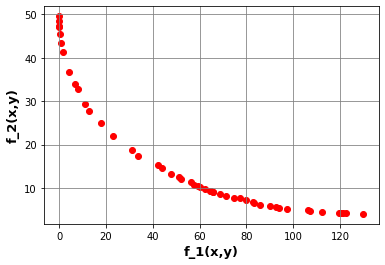

In [11]:

fu1=np.zeros(archive.shape[0])
fu2=np.zeros(archive.shape[0])
for i in range(archive.shape[0]):
            fu1[i], fu2[i] = ff(archive[i])
plt.scatter(fu1, fu2, color="Red")
x=np.linspace(0,5,300)
y=np.linspace(0,3,300)
ff1=np.zeros(x.size)
ff2=np.zeros(y.size)
xx=np.stack((x, y), axis=1)
for i in range(x.size):
    ff1[i], ff2[i] = ff(xx[i])
#plt.plot(ff1, ff2, color='Red', linewidth=2.0)
print(ff1.size)
plt.grid(b=None, color='grey', which='major', axis='both')
plt.xlabel("f_1(x,y)", fontsize=13,fontweight='bold')
plt.ylabel("f_2(x,y)",fontsize=13,fontweight='bold')
#plt.title("Fronte de pareto",fontsize=15,fontweight='bold')
sol=np.stack((fu1, fu2), axis=1)
nome="amosa-fun"
nome2="amosa-archive"
hora=str(int(end))
arquivo=nome+hora+".pdf"
plt.savefig(arquivo, format='pdf', dpi=600)
np.savetxt("amosa-bihrn-and-korn.csv", sol, delimiter=" ")



In [12]:
def displacement(P,Q):
    displace=0
    Ps=P.shape[0]
    Qs=Q.shape[0]
    for i in range(0,Ps-1):
        dif=0
        mvalue=0
        for u in range(0,Qs-1):
            aux=0
            for col in range(0,P.shape[1]):
                aux=aux+(P[i][col]-Q[u][col])**2
            dif=np.sqrt(aux)
            if dif<mvalue:
                mvalue=dif
        displace=displace+dif
    displace=displace/Ps
    return displace

In [13]:
ds=displacement(xx, archive)
print(ds)

2.097508847897932
